<h1> Cálculos para "Periodic solutions for a Sitnikov restricted four-body problem with primaries in a colinear configuration" </h4>


In [1]:
from sympy import *
init_printing() #muestra símbolos más agradab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
R=lambda n,d: Rational(n,d)

/home/fernando/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<h2> Ecuación de Euler</h2>

In [2]:
m=symbols('m0:%s' %3, positive=True) #masas
var('r')#r 
m=[1,m[1],m[2]]# la masa m0 es 1
f=r**5 + 3*r**4 + 3*r**3 + m[1]*r**5 + 2*m[1]*r**4 + m[1]*r**3 - m[1]*r**2 - 2*m[1]*r - m[1] - 3*m[2]*r**2 - 3*m[2]*r - m[2]
f

<h2> 2. $r(m_1,m_2)$ es concava respecto a $m_2$ </h2>

<b> Teorema 2.</b>  $r(m_1,m_2)$ es concava respecto a $m_2$ para $m_1$ fijo. 

<b>Dem.</b> Veamos que $\frac{\partial^2 r}{\partial m_2^2}<0$. En la expresión de $f$ sustituímos $r$ por una función de $m_1,m_2$ llamada $R(m_1,m_2)$. A la expresión que resulta $f_1$ la derivamos respecto a $m_2$ y despejamos $\frac{\partial R}{\partial m_2}$ en función de $R$. 

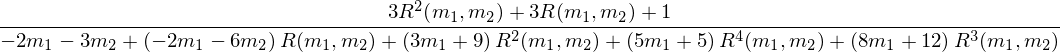

In [3]:
R=Function('R')(m[1],m[2])
f1=f.subs(r,R)
f1=f1.diff(m[2])
r_m2=solve(f1,R.diff(m[2]))[0].collect(R)
r_m2


La expresión  <b>r_m2</b> es la derivada $\partial r/\partial m_2$ escrita en función de $R(m_1,m_2)$. En la celda debajo derivamos <b>r_m2</b> respecto a $m_2$, aparece nuevamente $\frac{\partial R}{\partial m_2}$ que es sustituído por <b>r_m2</b>. Por último, se vuelve a sustituír $R$ por $r$ por simplicidad

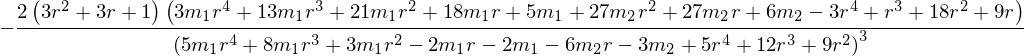

In [4]:
f2=r_m2.diff(m[2]).subs(R.diff(m[2]),r_m2).subs(R,r)
f2.simplify().factor()


Hay que demostrar que la expresión es negativa. Tomo los dos factores que no tienen un signo definido y los estudio por separado.

In [5]:
num=(3*m[1]*r**4 + 13*m[1]*r**3 + 21*m[1]*r**2 + 18*m[1]*r + 5*m[1] + 27*m[2]*r**2 + 27*m[2]*r + 6*m[2] - 3*r**4 + r**3 + 18*r**2 + 9*r)
dem=5*m[1]*r**4 + 8*m[1]*r**3 + 3*m[1]*r**2 - 2*m[1]*r - 2*m[1] - 6*m[2]*r - 3*m[2] + 5*r**4 + 12*r**3 + 9*r**2


Aquí usamos la fórmula para $r$: 
$$ r^3=\frac{m_2(3r^2+3r+1)+m_1(r+1)^2}{(r^2+3r+3)+m_1(r+1)^2}=:g$$
Se utiliza para reemplazar $r^3$ por $g$ y $r^4$ por $rg$


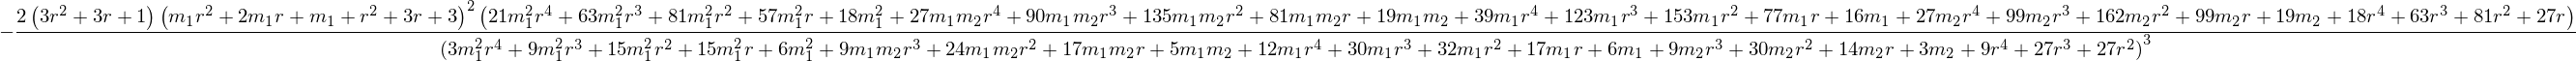

In [6]:
g=(m[2]*(3*r**2+3*r+1)+m[1]*(r+1)**2)/((r**2+3*r+3)+m[1]*(r+1)**2)
num.collect(r).subs({r**4:g*r,r**3:g}).factor().collect(r)
f2.simplify().factor().subs({r**4:g*r,r**3:g}).factor()

La expresión tiene sólo términos positivos. Hacemos lo mismo con "dem"

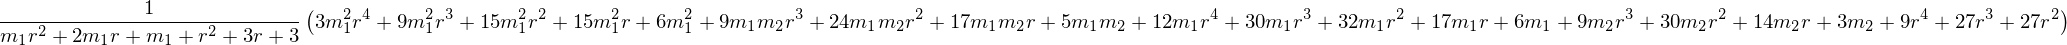

In [7]:
dem.subs({r**4:g*r,r**3:g}).factor()

También aparecen sólo términos positivos. Por consiguiente se llega a lo que queríamos. $\square$

<h3> Demostración Teorema Principal para $m_2>1$. </h3> 

Recordemos 

$$U<\frac{m_i^2}{|q_i|}+\frac{m_{i+1}^2}{|q_{i+1}|}$$ 
donde $i=0$ o $i=1$ acorde a que el centro de masas $c$ satisface $c\in [q_i,q_{i+1}]$


Teniendo en cuenta que $r$ es concava respecto a $m_2$ y que $r>1$ cuando $m_2>1$, vamos usar como cotas de $r$, la constante $1$ y la recta tangente respecto a la variable $m_2$, con $m_1$ fijo. Evaluemos $\left.\frac{\partial r}{\partial m_2}\right|_{m_2=1}$ (notar que $\forall m_1>0: r(m_1,1)=1$).


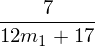

In [8]:
r_m2.subs({R:1,m[2]:1})

Luego por concavidad si $m_2>1$
$$r(m_1,m_2)\leq \frac{7}{12m_1+17}(m_2-1)+1.$$
        

In [9]:
var('r',positive=True) #introducimos la suposicion r>0
x=[0,1,1+r]#posiciones
c=sum([m[j]*x[j]/sum(m) for j in range(3)]) #centro masas
q=[(h-c).simplify() for h in x] #coordenadas varicentricas
U=sum([ sum([m[i]*m[j]/abs(x[i]-x[j]) for i in range(j) ]) for j in range(3)]) #potencial
Q=[m[i]**2/abs(q[i]) for i in range(3)]


Supongamos $m_2>1$. Entonces $r>1$ y $c>1$, es decir $c$ está entre la segunda y tercer masas. Entoces $q_1<0$ y $q_2>0$

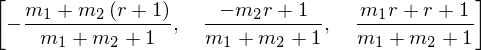

In [10]:
q

In [11]:
Q=m[1]**2/(-q[1])+m[2]**2/q[2]

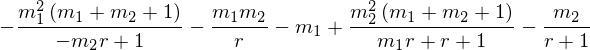

In [12]:
Exp=-U+Q
Exp

Ahora sabemos que $1<r<\frac{7}{12m_1+17}(m_2-1)+1$, acotamos $r$ en cada termino de  <b>Exp</b> por el correspondiente valor para acotar por debajo <b>Exp</b> 

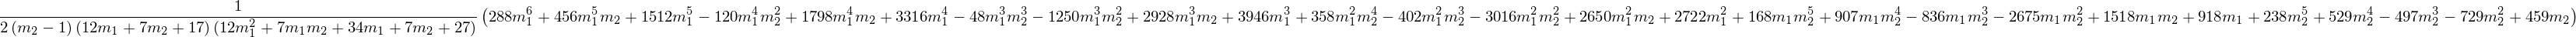

In [13]:
Rem=7/(12*m[1]+17)*(m[2]-1)+1
Exp2=m[1]**2*(m[1] + m[2] + 1)/(m[2]*Rem- 1) - m[1]*m[2] - m[1] + m[2]**2*(m[1]+ m[2] + 1)/(m[1] *Rem+ Rem + 1) - m[2]/2
Exp2.factor().simplify()

Habría que ver que el segundo factor es positivo. 

Tomamos ese monstruoso segundo factor. Tiene términos positivos y negativos, pero se ve mejor si tomamos dos variables nuevas $s$ y $\alpha$, positivas y sustituímos $m_1=s$ y $m_2=1+\alpha s$, expandimos la expresión y luego agrupamos de acuerdo con potencias de $s$.

In [14]:
Monstruo=288*m[1]**6 + 456*m[1]**5*m[2] + 1512*m[1]**5+ 1798*m[1]**4*m[2] + 3316*m[1]**4 + 2928*m[1]**3*m[2] + 3946*m[1]**3 + 358*m[1]**2*m[2]**4+ 2650*m[1]**2*m[2] + 2722*m[1]**2 + 168*m[1]*m[2]**5 + 907*m[1]*m[2]**4  + 1518*m[1]*m[2] + 918*m[1] + 238*m[2]**5 + 529*m[2]**4 - 497*m[2]**3 - 729*m[2]**2 + 459*m[2] - 120*m[1]**4*m[2]**2  - 3016*m[1]**2*m[2]**2 - 48*m[1]**3*m[2]**3  - 402*m[1]**2*m[2]**3- 836*m[1]*m[2]**3 - 1250*m[1]**3*m[2]**2- 2675*m[1]*m[2]**2
var('alpha,s',positive=True)
Monstruo.subs({m[1]:s,m[2]:alpha*s+1}).expand().collect(s)

En la expresión que resulta, todos los polinomios en $\alpha$ que acompañan a potencias de $s$ son positivos para $\alpha>0$. Lo razonamos con uno de ellos, con los otros es igual. Supongamos el de $s^4$: 
$$p(\alpha)=1719\alpha^4+4472\alpha^3-2074\alpha^2+284\alpha+4994$$
El caso es que cuando $\alpha\leq 1$ el término $-2074\alpha^2$ es dominado por el 4994. En cambio cuando $\alpha\geq 1$ el término $-2074\alpha^2$ lo domina el  $4472\alpha^3$. En todos los polinomios que corresponden a distintas potencias de $\alpha$ se aplica un razonamiento similar.  




<h2> Estimación por debajo de $r(m_1,m_2)$</h2>
Vamos a buscar una recta $l=(1-c(m_1))m_2+c(m_1)$ que acote por debajo a $r$.  Tratamos estimar $c(m_1)$.
Usamos una fórmula de punto fijo para resolver numéricamente la ecuación de Euler. 

In [15]:
var('r')
def SolEu(m1,m2,iter):
    SolEu=1.0
    h=lambda r: ((m1*(r+1)**2+m2*(3*r**2+3*r+1))/(m1*(r+1)**2.0+r**2.0+3.0*r+3.0))**(1.0/3.0)
    for j in range(iter):
        SolEu=h(SolEu)
    return SolEu

Estimamos una recto por debajo de $r(m_1,m_2)$ para $m_1$ fijo. La buscamos que pase por $(1,1)$ y $(0,y_0)$. Tratemos de estimar $y_0$. 

In [16]:
m1=np.arange(0,10,0.1)
m2=np.zeros(np.shape(m1))
r_aprox=SolEu(m1,m2,20)
plt.plot(m1,r_aprox)
plt.plot(m1,m1/(m1+1))
plt.show()


<img src="https://raw.githubusercontent.com/fdmazzone/ArchivosProyecto/master/MEcanica%20Celeste/r_corte_m1.png" width="50%" height="50%"/>

Se parece a $m_1\mapsto m_1/(m_1+1)$.

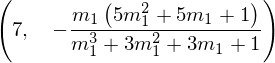

In [17]:
Rem=m[1]/(m[1]+1)
f.subs(m[2],0).subs(r,1), f.subs(r,Rem).subs(m[2],0).simplify()

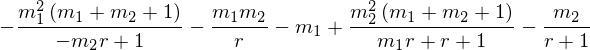

In [18]:
Exp

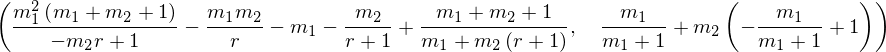

In [19]:
m=symbols('m0:%s' %3, positive=True) #masas
var('r')#r 
m=[1,m[1],m[2]]#
ord_or=m[1]/(m[1]+1)
Rem=(1-ord_or)*m[2]+ord_or
Q=m[0]**2/(-q[0])+m[1]**2/q[1]
Exp3=Q-U
Exp3, Rem

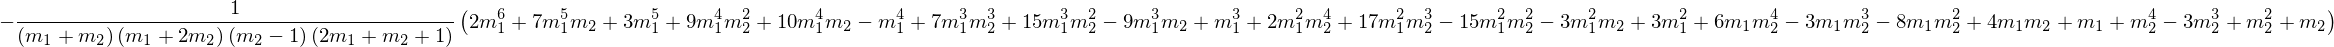

In [20]:
Expr3=m[1]**2*(m[1] + m[2] + 1)/(-m[2]*Rem + 1) - m[1]*m[2]/Rem - m[1] - m[2]/(Rem + 1) + (m[1] + m[2] + 1)/(m[1] + m[2]*(2))
Expr3.factor()

In [21]:
P=2*m[1]**6 + 7*m[1]**5*m[2] + 3*m[1]**5 + 9*m[1]**4*m[2]**2 + 10*m[1]**4*m[2] - m[1]**4 + 7*m[1]**3*m[2]**3 + 15*m[1]**3*m[2]**2 - 9*m[1]**3*m[2] + m[1]**3 + 2*m[1]**2*m[2]**4 + 17*m[1]**2*m[2]**3 - 15*m[1]**2*m[2]**2 - 3*m[1]**2*m[2] + 3*m[1]**2 + 6*m[1]*m[2]**4 - 3*m[1]*m[2]**3 - 8*m[1]*m[2]**2 + 4*m[1]*m[2] + m[1] + m[2]**4 - 3*m[2]**3 + m[2]**2 + m[2]

<h2> Demostración de la desigualdad </h2>

Para $m_1< 1$ agrupamos en potencias de $m_1$

In [22]:
P.collect(m[1])

Vamos a ver que si uno de los coeficientes que acompañan a $m_1$ es negativo, los otros restantes son positivos. Recolectemos los polinomios, llamamos $p_i$ al polinomio que acompaña a $m_1^i$. 

In [23]:
p=[]
p.append(poly(P.subs(m[1],0),m[2],domain='QQ'))
for k in range(1,7):
    p.append(poly(P.coeff(m[1]**k),m[2],domain='QQ'))
p

<h2> Regiones de negatividad de los polinomios $p_i$. </h2>

In [24]:
np.roots(p[4].coeffs())

array([-1.2034391 ,  0.09232799])

llamemos $x_{4,1}$ a la única raíz  positiva de $p_4$ 

In [25]:
np.roots(p[3].coeffs())

array([-2.64864429,  0.35298958,  0.15279757])

llamemos $x_{3,1}$ y $x_{3,2}$  a la dos raices (en orden)  positivas de $p_3$ 

In [26]:
np.roots(p[2].coeffs())

array([-9.28821575, -0.44220006,  0.73041581,  0.5       ])

llamemos $x_{2,1}$ y $x_{2,2}$  a las dos raices (en orden)  positivas de $p_2$ 

In [27]:
np.roots(p[1].coeffs())

array([-1.11382825,  1.        ,  0.80070595, -0.18687769])

llamemos $x_{1,1}$ a la raíz  en $(0,1)$  de $p_1$ 

In [28]:
np.roots(p[0].coeffs())

array([ 2.41421356,  1.        , -0.41421356])

Entonces $p_0\geq 0$ en $[0,1]$

Entonces

$$0<x_{4,1}<x_{3,1}<x_{3,2}<x_{2,1}<x_{2,2}<x_{1,1}<1.$$

<h2> Analisis de $P$ por regiones de positividad de los $p_i$ </h2>

Escribimos $P(m_1,m_2)=\sum_{i=0}^6 p_i(m_2) m_1^i$ y consideramos los siguientes casos

1) $0<m_1<\frac12$ y $x_{1,1} \leq m_2\leq 1$. 

$$P(m_1,m_2) \geq p_0(m_2)+\frac12p_1(m_2)=4 m_{2}^{4} - \frac{9 m_{2}^{3}}{2} - 3 m_{2}^{2} + 3 m_{2} + \frac{1}{2}$$



In [29]:
np.roots((p[0]+p[1]/2).coeffs())

array([ 1.06086593,  1.        , -0.78594709, -0.14991884])

$P\geq 0$ en $[0,\frac12]\times [x_{1,1},1]$


2) $\frac12 \leq m_1\leq 1$ y $x_{1,1} \leq m_2 \leq 1$. 
$$P(m_1,m_2) \geq p_0(m_2)+p_1(m_2)+(\frac12)^2p_2(m_2)=$$



In [30]:
np.roots((p[0]+p[1]+p[2]/4).coeffs())

array([-1.20850466+0.j        ,  0.84998736+0.15963079j,
        0.84998736-0.15963079j, -0.25813672+0.j        ])

$P\geq 0$ en $[\frac12,1]\times [x_{1,1},1]$


3) $0 \leq m_1\leq 1$ y $x_{2,1} \leq m_2 \leq  x_{2,2}$. 
$$P(m_1,m_2) \geq p_0(m_2)+p_2(m_2)$$


In [31]:
np.roots((p[0]+p[2]).coeffs()), (p[0]+p[2]).simplify()

(array([-5.48871857+0.j        , -0.44509005+0.j        ,
         0.63357098+0.08902221j,  0.63357098-0.08902221j]),
 Poly(3*m2**4 + 14*m2**3 - 14*m2**2 - 2*m2 + 3, m2, domain='ZZ'))

$P\geq 0$ en $[0,1]\times [x_{2,1},x_{2,2}]$


4) $(m_1,m_2)\in [0,1]\times [x_{3,1}, x_{3,2}]$. 
$$P(m_1,m_2) \geq p_0(m_2)+p_3(m_2)$$

In [32]:
np.roots((p[0]+p[3]).coeffs()), (p[0]+p[3]).simplify()

(array([-2.22925156+3.60819685j, -2.22925156-3.60819685j,
         0.22925156+0.05508482j,  0.22925156-0.05508482j]),
 Poly(m2**4 + 4*m2**3 + 16*m2**2 - 8*m2 + 1, m2, domain='ZZ'))

$P\geq 0$ en $[0,1]\times [x_{3,1}, x_{3,2}]$ (Los últimos 3 términos son un cuadrado prefecto)


5) $(m_1,m_2)\in [0,1]\times [0, x_{4,1}]$. 
$$P(m_1,m_2) \geq m_1^4( p_0(m_2)+p_1(m_2)+p_4(m_2))$$

In [33]:
np.roots((p[0]+p[1]+p[4]).coeffs()), (p[0]+p[1]+p[4]).simplify()

(array([ 0.92857143+1.13164139j,  0.92857143-1.13164139j, -1.00000000+0.j        ]),
 Poly(7*m2**4 - 6*m2**3 + 2*m2**2 + 15*m2, m2, domain='ZZ'))

$P\geq 0$ en $[0,1]\times [0, x_{4,1}]$ ($-6m_2^3+15m_2$ es claramente positivo)


6) $(m_1,m_2)\in [1,+\infty)\times [0, 1]$. 
                  
Recolectamos potencias de $m_2$ 

In [34]:
var('x,y')
P.collect(m[2])

Como $m_1\geq 1$ es facil ver que todos los coeficientes son mayores que cero